<a href="https://colab.research.google.com/github/shilz1007/shilz1007/blob/main/KaggleTrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shilzchatterjee","key":"33d3d594402d1567b2a86377e8513f75"}'}

In [3]:
!mkdir /root/.kaggle

In [4]:
! cp kaggle.json /root/.kaggle/

In [5]:
! chmod 600 /root/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              237KB  2021-11-10 18:11:20          15702  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           9506  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           4287  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-10-22 10:48:21           3488  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Jo

In [7]:
! kaggle datasets download -d ttungl/adience-benchmark-gender-and-age-classification

 99% 1.37G/1.39G [00:38<00:00, 72.0MB/s]
100% 1.39G/1.39G [00:38<00:00, 38.6MB/s]


In [8]:
!unzip adience-benchmark-gender-and-age-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1590.8448553152_ee57286766_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1590.8672510540_b644469799_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1590.8672510848_af2939038b_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1590.9606205853_8e636e8abb_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1591.8053467917_518c5f2cd3_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1591.8069511407_3390c2bf9c_o.jpg  
  inflating: AdienceBenchmarkGenderAndAgeClassification/faces/7651777@N03/coarse_tilt_aligned_face.1592.8516377288_0d7350e215_o.jpg  
  inflating

In [9]:
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import random

In [10]:
data_parent = '/content/AdienceBenchmarkGenderAndAgeClassification'
print(os.listdir(data_parent))

['fold_0_data.txt', 'fold_3_data.txt', 'fold_2_data.txt', 'faces', 'fold_1_data.txt', 'AdienceBenchmarkGenderAndAgeClassification', '__MACOSX', 'fold_4_data.txt']


In [11]:
fold_0 = pd.read_csv(os.path.join(data_parent, 'fold_0_data.txt'), sep='\t')
fold_1 = pd.read_csv(os.path.join(data_parent, 'fold_1_data.txt'),sep='\t')
fold_2 = pd.read_csv(os.path.join(data_parent, 'fold_2_data.txt'),sep='\t')
fold_3 = pd.read_csv(os.path.join(data_parent, 'fold_3_data.txt'),sep='\t')
fold_4 = pd.read_csv(os.path.join(data_parent, 'fold_4_data.txt'),sep='\t')
total_data = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4], ignore_index=True)
total_data.head()

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34


In [12]:
print('[+] length of the file:', len(total_data))
print('[+] unique values of Age:')
print(total_data.age.unique())
print('===================================================')
print('[+] Number of None Values in Age:')
print((total_data.age == 'None').sum())
print('[+] unique values of Gender:')
print(total_data.gender.unique())
print('===================================================')
print('[+] Number of nan values in Gender:')
print(total_data.gender.isna().sum())

[+] length of the file: 19370
[+] unique values of Age:
['(25, 32)' '(38, 43)' '(4, 6)' '(60, 100)' '(15, 20)' '(48, 53)'
 '(8, 12)' '(0, 2)' 'None' '(38, 48)' '35' '3' '55' '58' '22' '13' '45'
 '36' '23' '(38, 42)' '(8, 23)' '(27, 32)' '57' '56' '2' '29' '34' '42'
 '46' '32']
[+] Number of None Values in Age:
748
[+] unique values of Gender:
['f' 'm' nan 'u']
[+] Number of nan values in Gender:
779


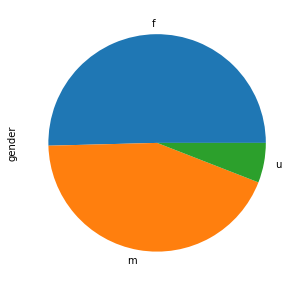

In [13]:
total_data.groupby('gender')['gender'].count().plot.pie(figsize=(10, 5))

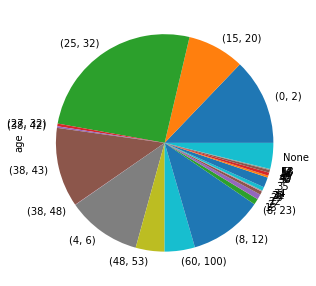

In [14]:
total_data.groupby('age')['age'].count().plot.pie(figsize=(10, 5))

[+] Image path: /content/AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.1.10399863183_a04f4c26a1_o.jpg
[+] Image shape: (600, 600, 3)
[!] Age: (25, 32) Gender: f


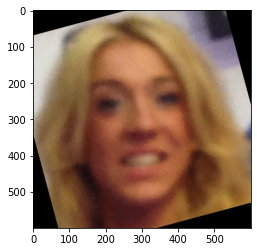

In [15]:
sample_num = 200
im_name = total_data.iloc[sample_num].original_image
im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
print('[+] Image path:', im_path)
image = cv2.imread(im_path)
print('[+] Image shape:', image.shape)
print('[!] Age:', total_data.iloc[sample_num].age, 'Gender:', total_data.iloc[sample_num].gender)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

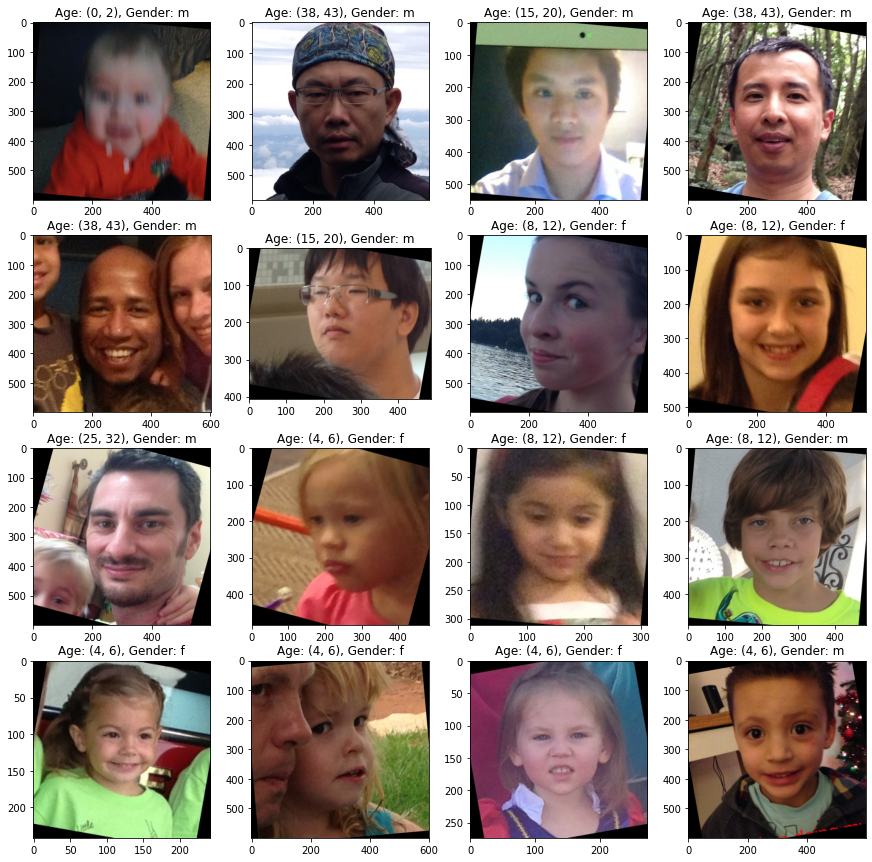

In [16]:
images = []
for _ in range(16):
    sample_num = random.randint(0, len(total_data))
    im_name = total_data.iloc[sample_num].original_image
    im_path = os.path.join(data_parent, 'faces',str(total_data.iloc[sample_num].user_id), 'coarse_tilt_aligned_face.' + str(total_data.iloc[sample_num].face_id) + '.' + im_name)
    image = cv2.imread(im_path)
    age = total_data.iloc[sample_num].age
    gender = total_data.iloc[sample_num].gender
    n_col = 4
    n_rows = 4
    images.append((image, age, gender))
    
fig, axs = plt.subplots(ncols=n_col, nrows=n_rows, figsize=(15,15))
count = 0
for i in range(n_rows):
      for j in range(n_col):
        axs[i][j].imshow(cv2.cvtColor(images[count][0], cv2.COLOR_BGR2RGB))
        axs[i][j].set_title(f'Age: {images[count][1]}, Gender: {images[count][2]}')
        count+=1
plt.show()

In [17]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]
age_mapping_dict = {each[0]: each[1] for each in age_mapping}

drop_labels = []
for idx, each in enumerate(total_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        total_data.age.loc[idx] = age_mapping_dict[each]
total_data = total_data.drop(labels=drop_labels, axis=0) #droped None values
total_data.age.value_counts(dropna=False)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

In [18]:
total_data = total_data.dropna()
total_data['full_path'] = total_data.apply(lambda x: os.path.join(data_parent, 'faces', str(x.user_id), 'coarse_tilt_aligned_face.' + str(x.face_id) + '.' + x.original_image), axis=1)
total_data.age.unique(), len(total_data.age.unique()), total_data.gender.unique()

(array(['25-32', '38-43', '4-6', '60+', '15-20', '48-53', '8-13', '0-2'],
       dtype=object), 8, array(['f', 'm', 'u'], dtype=object))

In [19]:
gender_map = {'f':0, 
             'm':1,
             'u':2}
age_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}
total_data.gender = total_data.gender.replace(gender_map)
total_data.age=total_data.age.replace(age_map)

In [20]:
gender_labels = total_data.gender.values.tolist()
age_labels= total_data.age.values.tolist()
train_paths = total_data.full_path.values.tolist()
len(gender_labels), gender_labels[0],len(age_labels),age_labels[0], train_paths[0]

(18551,
 0,
 18551,
 4,
 '/content/AdienceBenchmarkGenderAndAgeClassification/faces/30601258@N03/coarse_tilt_aligned_face.1.10399646885_67c7d20df9_o.jpg')

In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
shuffle_list = list(zip(train_paths, gender_labels,age_labels))
shuffle_list = random.sample(shuffle_list, len(train_paths))
train_paths, gender_labels,age_labels = zip(*shuffle_list)
age_labels = np.array(list(age_labels)).reshape((-1, 1))
enc= OneHotEncoder()
age_labels = enc.fit_transform(age_labels).toarray() 

In [23]:
train_split = 0.75
train_sample = int(train_split * len(total_data))

train_data = train_paths[:train_sample]
validation_data = train_paths[train_sample:]

train_labels_gender = gender_labels[:train_sample]
validation_labels_gender = gender_labels[train_sample:]

train_labels_age=age_labels[:train_sample]
validation_labels_age=age_labels[train_sample:]
print("train data count:")
len(train_data), len(train_labels_gender), len(train_labels_age)
# print("validation data count:")
# len(validation_data), len(validation_labels)

train data count:


(13913, 13913, 13913)

In [24]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import multiprocessing

In [25]:
# train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_gender),list(train_labels_age)))
# validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data), list(validation_labels_gender),list(validation_labels_age)))
train_dataset = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_age)))
validation_dataset = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_age)))

In [26]:
# for path, target1,target2 in train_dataset.take(1):
#     print(path, target1,target2)
for path, target1 in train_dataset.take(1):
    print(path, target1)

tf.Tensor(b'/content/AdienceBenchmarkGenderAndAgeClassification/faces/10129575@N03/coarse_tilt_aligned_face.813.9421607064_0c4e1d14d3_o.jpg', shape=(), dtype=string) tf.Tensor([0. 0. 0. 1. 0. 0. 0. 0.], shape=(8,), dtype=float64)


In [27]:
def preprocess_func(path, label_age):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_age

In [28]:
import multiprocessing

In [29]:
train_batches = train_dataset.shuffle(500).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches = validation_dataset.shuffle(500).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)

(16, 128, 128, 3) (16, 8)
tf.Tensor([0. 0. 0. 0. 0. 0. 1. 0.], shape=(8,), dtype=float64)


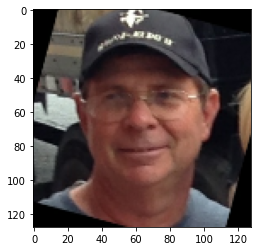

In [30]:
for image, target1 in train_batches.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, padding='same', strides=2, activation='sigmoid', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.35),
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
#     tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.45),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(),
#     tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

model.compile(optimizer='adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         224       
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                    

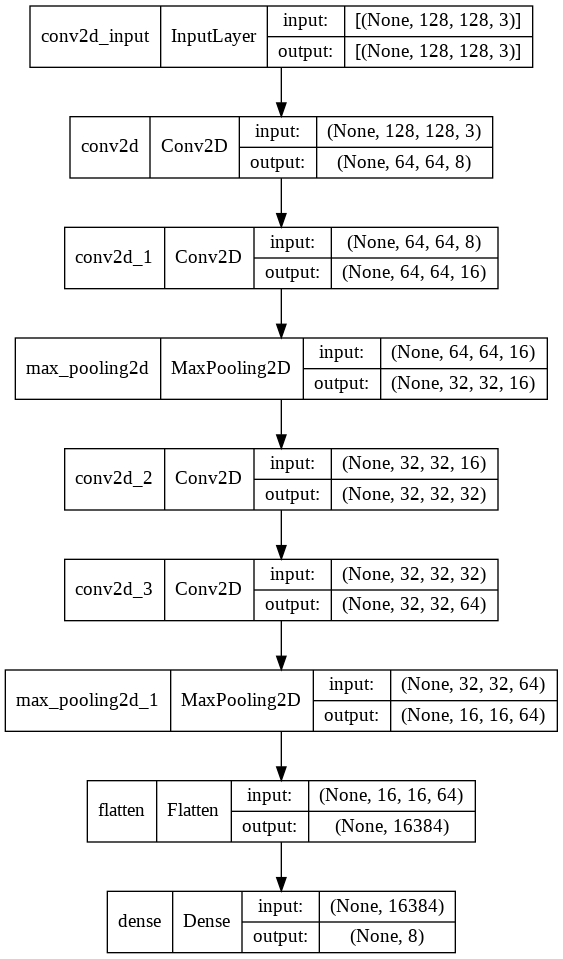

In [32]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [33]:
history = model.fit(train_batches, epochs=10, validation_data = validation_batches)

Epoch 1/10
870/870 [==============================] - 72s 48ms/step - loss: 2.0021 - accuracy: 0.2765 - val_loss: 1.9441 - val_accuracy: 0.2943
Epoch 2/10
870/870 [==============================] - 11s 13ms/step - loss: 1.9465 - accuracy: 0.2787 - val_loss: 1.9438 - val_accuracy: 0.2943
Epoch 3/10
870/870 [==============================] - 11s 13ms/step - loss: 1.9461 - accuracy: 0.2787 - val_loss: 1.9435 - val_accuracy: 0.2943
Epoch 4/10
870/870 [==============================] - 11s 12ms/step - loss: 1.9458 - accuracy: 0.2787 - val_loss: 1.9429 - val_accuracy: 0.2943
Epoch 5/10
870/870 [==============================] - 11s 12ms/step - loss: 1.9454 - accuracy: 0.2787 - val_loss: 1.9419 - val_accuracy: 0.2943
Epoch 6/10
870/870 [==============================] - 11s 13ms/step - loss: 1.9451 - accuracy: 0.2787 - val_loss: 1.9404 - val_accuracy: 0.2943
Epoch 7/10
870/870 [==============================] - 11s 12ms/step - loss: 1.9446 - accuracy: 0.2787 - val_loss: 1.9387 - val_accuracy:

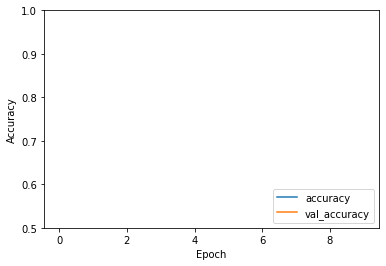

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

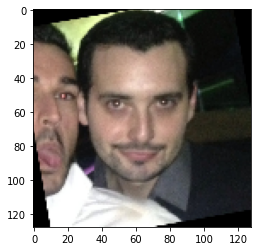

In [35]:
image_path = validation_data[7]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()

In [36]:
image = np.expand_dims(image, 0)
prediction = model.predict(image)

In [37]:
index = np.argmax(prediction)
decoding = {0:'0-2', 1:'4-6', 2:'8-13',3:'15-20',4:'25-32',5:'38-43',6:'48-53',7:'60+'}

print('[+] prediction is :', decoding[index]) 
# print(validation_data[7].age_labels)

[+] prediction is : 25-32


In [38]:
train_dataset2 = tf.data.Dataset.from_tensor_slices((list(train_data), list(train_labels_gender)))
validation_dataset2 = tf.data.Dataset.from_tensor_slices((list(validation_data),list(validation_labels_gender)))

In [39]:
for path, target1 in train_dataset2.take(1):
    print(path, target1)

tf.Tensor(b'/content/AdienceBenchmarkGenderAndAgeClassification/faces/10129575@N03/coarse_tilt_aligned_face.813.9421607064_0c4e1d14d3_o.jpg', shape=(), dtype=string) tf.Tensor(1, shape=(), dtype=int32)


In [40]:
def preprocess_func(path, label_gender):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [128, 128]) / 255.0
        
    return image, label_gender

In [41]:
train_batches2 = train_dataset2.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)
validation_batches2 = validation_dataset2.shuffle(1000).map(preprocess_func, num_parallel_calls=multiprocessing.cpu_count()).cache().batch(16).prefetch(tf.data.experimental.AUTOTUNE)

(16, 128, 128, 3) (16,)
tf.Tensor(1, shape=(), dtype=int32)


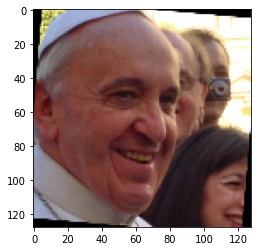

In [42]:
for image, target1 in train_batches2.take(1):
    print(image.shape, target1.shape)
    image = tf.squeeze(image[0])
    print(target1[0])

    plt.imshow(image)
    plt.show()
    break

In [43]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, 3, padding='same', strides=2, activation='sigmoid', input_shape=(128, 128, 3)),
#     tf.keras.layers.MaxPooling2D(),
#      tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='sigmoid'),
#     tf.keras.layers.MaxPooling2D(),
#      tf.keras.layers.Dropout(0.45),
    
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='sigmoid'),
    tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.4),
    
     tf.keras.layers.Conv2D(128, 3, padding='same', activation='sigmoid'),
      tf.keras.layers.Conv2D(258, 3, padding='same', activation='sigmoid'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Dropout(0.5), 
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'softmax')
])

model.compile(optimizer='adam', loss= tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 64, 64, 8)         224       
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                      

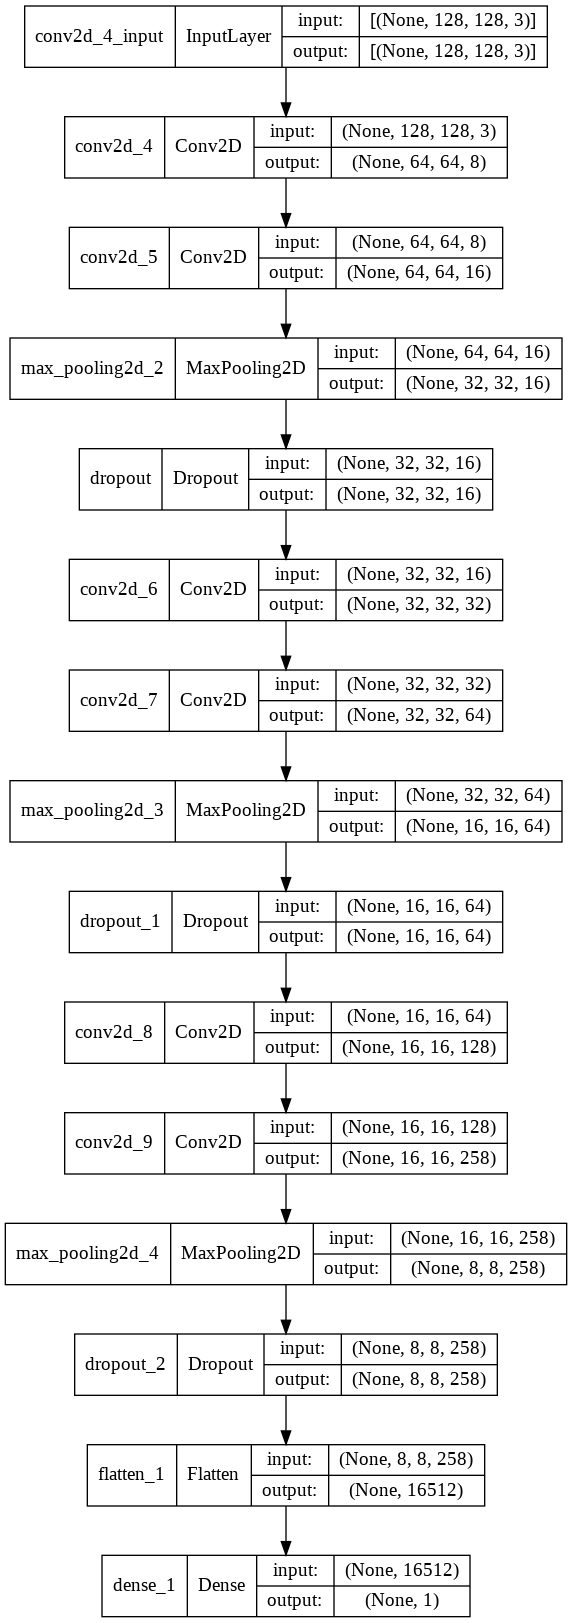

In [44]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [45]:
history = model.fit(train_batches2, epochs=10, validation_data = validation_batches2)

Epoch 1/10
870/870 [==============================] - 54s 61ms/step - loss: 0.0000e+00 - accuracy: 0.4371 - val_loss: 0.0000e+00 - val_accuracy: 0.4396
Epoch 2/10
870/870 [==============================] - 17s 19ms/step - loss: 0.0000e+00 - accuracy: 0.4371 - val_loss: 0.0000e+00 - val_accuracy: 0.4396
Epoch 3/10
870/870 [==============================] - 16s 19ms/step - loss: 0.0000e+00 - accuracy: 0.4371 - val_loss: 0.0000e+00 - val_accuracy: 0.4396
Epoch 4/10
870/870 [==============================] - 16s 19ms/step - loss: 0.0000e+00 - accuracy: 0.4371 - val_loss: 0.0000e+00 - val_accuracy: 0.4396
Epoch 5/10
870/870 [==============================] - 16s 19ms/step - loss: 0.0000e+00 - accuracy: 0.4371 - val_loss: 0.0000e+00 - val_accuracy: 0.4396
Epoch 6/10
870/870 [==============================] - 16s 19ms/step - loss: 0.0000e+00 - accuracy: 0.4371 - val_loss: 0.0000e+00 - val_accuracy: 0.4396
Epoch 7/10
870/870 [==============================] - 16s 19ms/step - loss: 0.0000e+00 -

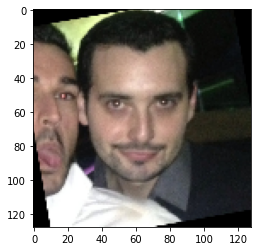

In [46]:
image_path = validation_data[7]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (128, 128)) / 255.0
plt.imshow(image)
plt.show()

In [47]:
image = np.expand_dims(image, 0)
prediction = model.predict(image)

In [48]:
index = np.argmax(prediction)
decoding = {0:'f', 1:'m', 2:'u'}

print('[+] prediction is :', decoding[index])

[+] prediction is : f
